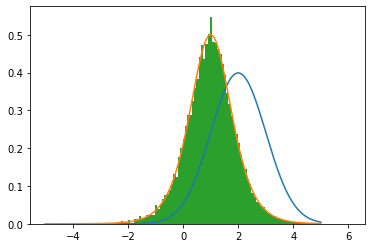

In [8]:
#implementation of SIR
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy.stats import uniform

zsBin = 1000.0
zsArea = 10.0
zs = [z / zsBin  - zsArea / 2.0 for z in range(0, int(zsArea * zsBin) + 1)]

def normalDistribution(z, sigma = 1.0, mu = 0.0):
    return math.exp(-(z - mu)**2 / (2*sigma**2)) / math.sqrt(2*math.pi*sigma**2)

def logisticDistribution(z, mu = 0.0, scale = 1.0):
    return math.exp(-(z - mu) / scale) / (scale * (1 + math.exp(-(z - mu) / scale))**2)

muNorm = 2.0
muLogistic = 1.0
sLogistic = 0.5

qNorm = [normalDistribution(z, mu = muNorm) for z in zs]
pLogistic = [logisticDistribution(z, mu = muLogistic, scale = sLogistic) for z in zs]

#Here is the sampling step
samplingNum = 100000
drawNorm = norm.rvs(loc = muNorm, scale = 1.0, size = samplingNum)

#Here, the weights are calculated
weights = [logisticDistribution(s, mu = muLogistic, scale = sLogistic) / normalDistribution(s, mu = muNorm) for s in drawNorm]    
weightSum = sum(weights)

#Here is the resampling step
resampled = []
samplingForResampling = uniform.rvs(loc = 0, scale = 1, size = samplingNum) * weightSum

for s in samplingForResampling:
    sumTmp = 0.0
    
    for w, z in zip(weights, drawNorm):
        sumTmp += w
        if s <= sumTmp:
            resampled.append(z)
            break

plt.plot(zs, qNorm)
plt.plot(zs, pLogistic)
plt.hist(resampled, bins = 100, density = 1.0)
plt.show()